In [69]:
import torch
from torchvision.models import vgg16_bn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
vgg16_bn = vgg16_bn(pretrained=True).to(device)

In [70]:
print(vgg16_bn)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [5]:
class SaveOutput:
    def __init__(self):
        self.outputs =[]
    def __call__(self,module,module_in,module_out):
        self.outputs.append(module_out)
    def clear(self):
        self.outputs = []

In [83]:
save_output = SaveOutput()
hook_handles = []
ct =0
for name,layer in vgg16_bn.named_modules():
    print(ct,name)
    if ct == 36 and isinstance(layer, torch.nn.modules.conv.Conv2d):
        print(layer) # target layer Conv5_1
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)
    ct+=1

0 
1 features
2 features.0
3 features.1
4 features.2
5 features.3
6 features.4
7 features.5
8 features.6
9 features.7
10 features.8
11 features.9
12 features.10
13 features.11
14 features.12
15 features.13
16 features.14
17 features.15
18 features.16
19 features.17
20 features.18
21 features.19
22 features.20
23 features.21
24 features.22
25 features.23
26 features.24
27 features.25
28 features.26
29 features.27
30 features.28
31 features.29
32 features.30
33 features.31
34 features.32
35 features.33
36 features.34
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
37 features.35
38 features.36
39 features.37
40 features.38
41 features.39
42 features.40
43 features.41
44 features.42
45 features.43
46 avgpool
47 classifier
48 classifier.0
49 classifier.1
50 classifier.2
51 classifier.3
52 classifier.4
53 classifier.5
54 classifier.6


In [15]:
from PIL import Image
from torchvision import transforms as T
image = Image.open('cat.jpg')
transform = T.Compose([T.Resize((224,224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)
print(X.shape)

torch.Size([1, 3, 224, 224])


In [84]:
out = vgg16_bn(X)

In [87]:
import numpy as np
print(len(save_output.outputs))
a0 = save_output.outputs[0].cpu().detach().numpy().squeeze()
print(a0.shape)
type(save_output.outputs[0].cpu().detach().numpy().squeeze())

1
(512, 14, 14)


numpy.ndarray

In [89]:
total = np.zeros((14,14))
total.shape

(14, 14)

In [91]:
for item in a0:
    #print(item.shape)
    total += item

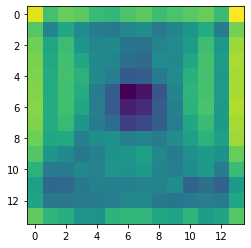

In [92]:
plt.imshow(total)